# EstudioDatos

In [1]:
import pandas as pd
from collections import Counter
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import ast

pd.set_option('max_colwidth', 250)

In [13]:
data = pd.read_csv('../00_Datos/Productos_Finales/175kProducts_20190311.csv', sep = ';', index_col=False)
data.head()

,Unnamed: 0,Unnamed: 0.1,alternative_id,availability_date,badges,brand,category,discount,eci_provider,gtin,...,media,module_name,name,position,price,quantity,status,store_id,variant,vendor
0,0,0.0,A28233506,NaN,['express_delivery'],Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.401700e+12,...,{'count': 1},NaN,Abrigo masculino con textura de mujer,NaN,"{'final': 199, 'currency': 'EUR'}",1,show_pdp,60,001060651400131002,NaN
1,1,1.0,A29054782,NaN,['express_delivery'],Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.606514e+12,...,{'count': 1},NaN,Abrigo doble faz de mujer con cinturón a tono,NaN,"{'final': 149, 'currency': 'EUR'}",1,show_pdp,60,001060651400180002,NaN
2,2,2.0,A27354432,NaN,['express_delivery'],Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.510564e+12,...,{'count': 1},NaN,Abrigo largo de antelina de mujer Woman El Corte Inglés,NaN,"{'final': 89.99, 'currency': 'EUR'}",1,show_pdp,60,001051056400107002,NaN
3,3,3.0,A28302706,NaN,['express_delivery'],Lloyd's,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.401701e+12,...,{'count': 1},NaN,Chaqueta térmica de mujer Lloyds con efecto cortavientos,NaN,"{'final': 129, 'currency': 'EUR'}",1,show_pdp,60,001019350401147002,NaN
4,4,4.0,A27435502,NaN,['express_delivery'],Lloyd's,"['Moda', 'Mujer', 'Abrigos']",NaN,00000000,2.193534e+12,...,{'count': 1},NaN,Parka 100% algodón de mujer Lloyds con capucha,NaN,"{'final': 149, 'currency': 'EUR'}",1,show_pdp,60,001019353400229002,NaN


In [4]:
data.shape

(175713, 22)

In [14]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'alternative_id', 'availability_date',
       'badges', 'brand', 'category', 'discount', 'eci_provider', 'gtin', 'id',
       'image', 'media', 'module_name', 'name', 'position', 'price',
       'quantity', 'status', 'store_id', 'variant', 'vendor'],
      dtype='object')

Borramos las columnas que sabemos que no vamos a necesitar de esta forma el DF ocupa menos y es mas facil de manejar

In [15]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'alternative_id', 'availability_date', 'badges',
                 'discount', 'eci_provider', 'gtin', 'media', 'module_name',
                 'position', 'quantity', 'status', 'store_id', 
                 'variant', 'vendor'], axis = 1)
data.head()

,brand,category,id,image,name,price
0,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,Abrigo masculino con textura de mujer,"{'final': 199, 'currency': 'EUR'}"
1,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,Abrigo doble faz de mujer con cinturón a tono,"{'final': 149, 'currency': 'EUR'}"
2,Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,Abrigo largo de antelina de mujer Woman El Corte Inglés,"{'final': 89.99, 'currency': 'EUR'}"
3,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,Chaqueta térmica de mujer Lloyds con efecto cortavientos,"{'final': 129, 'currency': 'EUR'}"
4,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,Parka 100% algodón de mujer Lloyds con capucha,"{'final': 149, 'currency': 'EUR'}"


### Me guardo las marcas para usarlas mas adelante

In [16]:
data.to_csv('Marcas_20190308.csv', sep = ';',index=False, encoding = 'UTF-8', index_label=False)

 ---

### Nulos?

C:\Users\Enric\AppData\Local\conda\conda\envs\DataScience\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


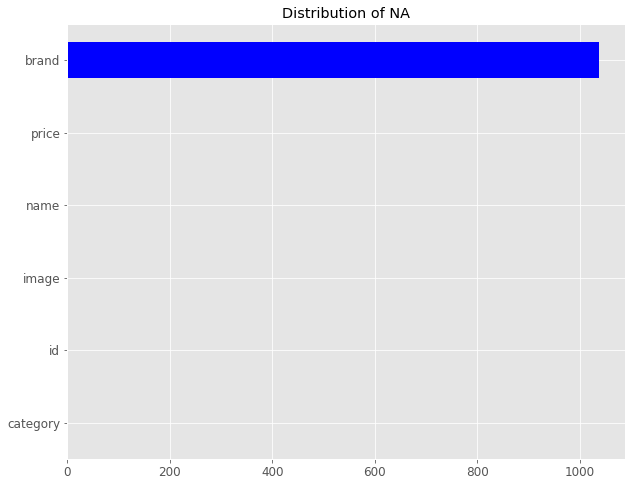

In [17]:
fig = plt.figure(figsize=(10, 8))
plt.title("Distribution of NA")
data.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Blue', fontsize=12)

Solo hay nulos en las marcas y unos 370 que de 88448 representa un 0.4% por tanto no es muy preocupante, además seguramente la marca la acabemos incorporando dentro del texto final por tanto en caso de que no se conoca la marca no la ánadiremos al corpus de texto de ese producto

## Categoria

In [33]:
data_copy = data.copy()

In [34]:
for i, lista in enumerate(data_copy['category'].values):
    data_copy['category'].values[i] = ast.literal_eval(lista)
for i, elem in enumerate(data_copy['category']):
    data_copy['category'].values[i] = [x.replace(" ", "_") for x in elem ]

In [35]:
# Comentar para solo juntar los de cada lista
data_copy['category'] = data_copy['category'].apply(lambda x: '_'.join(x))

In [45]:
data_copy['category'][100050]

'Electrodomésticos_Aire_acondicionado_Split_Split_1_x_1'

Ahora ya podemos sacar cuantas Categorias distintas hay y cuales son las que mas aparecen

### Top Categorias

Tenemos una lista de valores en vez de tener un unico valor por tanto necesitaremos suar la libreria Counter e itertools

In [54]:
n_categorias = data_copy['category'].value_counts()
print (n_categorias[:10])
print (len(n_categorias))
print (len(n_categorias[n_categorias > 10 ]))

Moda_Mujer_Punto_y_Jerseys                          1467
Moda_Joyería_y_Relojes_Relojes_Hombre               1444
Moda_Mujer_Camisetas                                1332
Moda                                                1331
Moda_Joyería_y_Relojes_Relojes_Mujer                1285
Deportes_Ropa_deportiva                             1240
Moda_Mujer_Camisas,_Blusas_y_Tops                   1239
Moda_Hombre_Camisas                                 1106
Moda_Infantil_Niño_(1-16_años)_Camisetas_y_Polos    1071
Moda_Mujer_Vestidos                                 1026
Name: category, dtype: int64
3503
1593


In [52]:
categories = Counter(itertools.chain.from_iterable(data_copy['category'].values))
categories.most_common()

[('_', 768052),
 ('a', 638880),
 ('e', 562370),
 ('o', 546618),
 ('s', 492922),
 ('r', 347964),
 ('i', 310142),
 ('n', 229789),
 ('t', 225679),
 ('d', 213555),
 ('c', 207056),
 ('l', 204997),
 ('M', 144716),
 ('u', 128202),
 ('m', 115469),
 ('p', 98318),
 ('y', 78440),
 ('b', 75981),
 ('C', 65207),
 ('g', 60463),
 ('j', 59074),
 ('ñ', 52347),
 ('P', 52165),
 ('f', 51121),
 ('B', 49970),
 ('A', 44335),
 ('H', 43327),
 ('í', 37499),
 ('R', 36029),
 ('I', 33743),
 ('-', 31265),
 ('N', 30110),
 ('J', 27718),
 ('1', 27092),
 ('é', 26352),
 ('E', 25151),
 ('ó', 24685),
 ('Z', 24011),
 ('6', 23244),
 ('D', 23148),
 ('(', 22690),
 (')', 22690),
 ('h', 22629),
 ('L', 22602),
 ('S', 22563),
 ('v', 20657),
 ('T', 16886),
 ('F', 15552),
 ('3', 10832),
 ('q', 10718),
 ('V', 10492),
 ('á', 10440),
 ('0', 10231),
 ('z', 8708),
 ('G', 7710),
 ('ú', 7298),
 ('O', 6736),
 ('x', 5901),
 ('k', 4830),
 (',', 4638),
 ('w', 1978),
 ('2', 1312),
 ('W', 1272),
 ('U', 771),
 ('4', 742),
 ('&', 696),
 ('9', 504)

Aqui tenemos un ejemplo parecido al de las Marcas, el objetivo es poner el texto de la Categoria en el Bag of Words de ese producto

#### Nos guardamos las categorias al igual que las marcas

In [50]:
subset = data_copy[['id', 'category']]
#subset = subset.groupby('category').apply(lambda x: x['id'].values.tolist()).reset_index(name='col')

In [51]:
subset

,id,category
0,1060651400131,Moda_Mujer_Abrigos
1,1060651400180,Moda_Mujer_Abrigos
2,1051056400107,Moda_Mujer_Abrigos
3,1019350401147,Moda_Mujer_Abrigos
4,1019353400229,Moda_Mujer_Abrigos
5,1019353400245,Moda_Mujer_Abrigos
6,1052353400071,Moda_Mujer_Abrigos
7,1087557400030,Moda_Mujer_Abrigos
8,1019350401022,Moda_Mujer_Abrigos
9,1051053400118,Moda_Mujer_Abrigos


In [55]:
subset.to_csv('Categorias_20190308.csv', sep = ';', index=False, encoding = 'UTF-8', index_label=False)

### Price

Se ha observado que el precio siempre esta en EUR y la cantidad no nos aporta ninguna info importante en este Proyecto, dados los datos que vamos a tener del cliente

In [43]:
data = data.drop(['price'], axis = 1)
data.head()

,Unnamed: 0,brand,category,id,image,name
0,0,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg,Abrigo masculino con textura de mujer
1,1,Woman Limited El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg,Abrigo doble faz de mujer con cinturón a tono
2,2,Woman El Corte Inglés,"['Moda', 'Mujer', 'Abrigos']",1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg,Abrigo largo de antelina de mujer Woman El Corte Inglés
3,3,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg,Chaqueta térmica de mujer Lloyds con efecto cortavientos
4,4,Lloyd's,"['Moda', 'Mujer', 'Abrigos']",1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg,Parka 100% algodón de mujer Lloyds con capucha


In [44]:
data.loc[70000]

Unnamed: 0                                                                                        70000
brand                                                                                   El Corte Inglés
category                                        ['Hogar', 'Menaje de mesa', 'Café y té', 'Tazas de té']
id                                                                                      001007227340655
image         http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201803/12/00107227340655____1__640x640.jpg
name                                                          Set de 2 tazas de té Buga El Corte Inglés
Name: 70000, dtype: object

## Imagenes

In [45]:
images = data[['id', 'image']]
images.head()

,id,image
0,1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg
1,1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg
2,1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg
3,1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg
4,1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg


In [46]:
images.to_csv('Imagenes_20190308.csv', sep = ';', index=False, encoding = 'UTF-8')

---